In [21]:
# get the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import os
import time

In [22]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
#from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import scipy.misc
import matplotlib
#import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D,MaxPooling3D, TimeDistributed, Conv2D, LSTM, SimpleRNN, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

import io
import matplotlib.pyplot as plt
import imageio
from sklearn.metrics import r2_score
# from IPython.display import Image, display
# from ipywidgets import widgets, Layout, HBox
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling3D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from tensorflow import keras
import tensorflow_addons as tfa

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, LSTM
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py
import pickle
import tensorflow as tf


In [23]:
def unscale(mat, VHI_test):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(VHI_test.reshape(277,228))
  unscaled = scaler.inverse_transform(mat.reshape(277,228))
  return unscaled


In [24]:
def colorcoding(mat):
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      #print(mat[i][j])
      if  mat[i][j] >80:
        mat[i][j] = 255
      # elif (mat[i][j]<80) &(mat[i][j] >70):             # Abnormally Dry
      #   mat[i][j]= 128
      elif (mat[i][j]<80) &(mat[i][j] >60):             # Abnormally Dry
        mat[i][j]= 128
      # elif (mat[i][j]<60) &(mat[i][j] >50):             # Abnormally Dry
      #   mat[i][j]= 64
      elif (mat[i][j]<60) &(mat[i][j] >40):             # Abnormally Dry
        mat[i][j]= 64
      # elif (mat[i][j]<40) &(mat[i][j] >30):             # Abnormally Dry
      #   mat[i][j]= 16
      elif (mat[i][j]<40) &(mat[i][j]>20):              # Moderate drought
        mat[i][j] = 32
      # elif (mat[i][j]<20) & (mat[i][j]>10):             # Severe drought
      #   mat[i][j] = 4
      elif (mat[i][j])<20:                              # Extreme  drought
        mat[i][j]= 0
  return mat

In [25]:
def load_data():
    data = []
    path = rf"{os.getcwd()}\src\yearly_data"
    for file in os.listdir(path):
        df = pd.read_csv(f'{path}/{file}')
        df.drop(columns=[df.columns[0]], axis=1, inplace=True)
        df.fillna(0.0, inplace=True)
        data.append(df.to_numpy())
    return np.array(data)

data = load_data()


In [26]:
def reshape_data(data):
    data_shifted = data[2:]
    data = data[:-2]
    data = data.reshape((38, 277, 228, 1))
    return data, data_shifted

data, data_shifted = reshape_data(data)

In [27]:
def train_test_split():
    train_dataset = data[:32]
    train_labels = data_shifted[:32]
    test_dataset = data[-6:]
    test_labels = data_shifted[-6:]
    print("Training Dataset Shapes: " + str(train_dataset.shape) + ", " + str(train_labels.shape))
    print("Validation Dataset Shapes: " + str(test_dataset.shape) + ", " + str(test_labels.shape))
    return train_dataset, train_labels, test_dataset, test_labels

train_dataset, train_labels, test_dataset, test_labels = train_test_split()

Training Dataset Shapes: (32, 277, 228, 1), (32, 277, 228)
Validation Dataset Shapes: (6, 277, 228, 1), (6, 277, 228)


In [28]:
def flatten_data():
    train_image = data[:32]
    train_label = data_shifted[:32]
    test_image = data[-6:]
    test_label = data_shifted[-6:]
    print(train_image.shape, train_label.shape, test_image.shape, test_label.shape)
    train_image_flattened = train_image.reshape(32,63156)
    train_label_flattened = train_label.reshape(32,63156)
    test_image_flattened = test_image.reshape(6,63156)
    test_label_flattened = test_label.reshape(6,63156)
    return train_image_flattened, train_label_flattened, test_image_flattened, test_label_flattened

train_image_flattened, train_label_flattened, test_image_flattened, test_label_flattened = flatten_data()

(32, 277, 228, 1) (32, 277, 228) (6, 277, 228, 1) (6, 277, 228)


In [29]:
import xgboost as xg
xgbr = xg.XGBRegressor(max_depth = 1, booster ='gbtree',objective='reg:squarederror',
                  n_estimators = 1, n_jobs= -1, verbosity=1)


In [30]:
start_time = time.time()
xgbr.fit(train_image_flattened, train_label_flattened)
end_time = time.time()
training_time = end_time - start_time

In [31]:
import pickle 

with open(rf"{os.getcwd()}\models\xgboost\xgboost.pkl", 'wb') as f:
    pickle.dump(xgbr, f)

In [32]:
import pickle 

with open(rf"{os.getcwd()}\models\xgboost\xgboost.pkl", 'wb') as f:
    pickle.dump(xgbr, f)

In [33]:
predicted_xgb_12 = xgbr.predict(test_image_flattened)
predicted_xgb_12 = predicted_xgb_12.reshape(6, 277, 228)
print(predicted_xgb_12.shape)

(6, 277, 228)


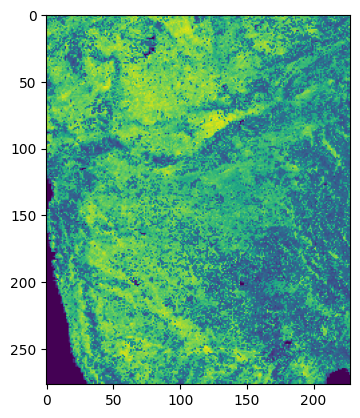

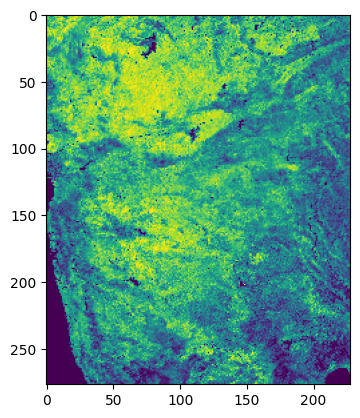

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf

pred = predicted_xgb_12[0].reshape(277,228)
yreal = test_labels[0].reshape(277,228)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)


In [35]:
model = xgbr
from sklearn.metrics import r2_score

test_r2_scores = []
test_mae = []
test_mse = []
for i in range(len(test_image_flattened)):
    pred = predicted_xgb_12[i].reshape(277,228)
    y_real = test_labels[i].reshape(277,228)
    r2 = r2_score(y_real,pred)
    test_r2_scores.append(r2)
    error = (pred - y_real).reshape(277*228)
    mae = sum(abs(error))/len(error)
    test_mae.append(mae)
    mse = np.mean((error) ** 2)
    test_mse.append(mse)


print("Training Time : XGBoost : ", training_time)
print("R2 Score for XGBoost : ", sum(test_r2_scores)/len(test_r2_scores))
print("MSE for XGBoost : ", sum(test_mse)/len(test_mse))
print("MAE Score for XGBoost : ", sum(test_mae)/len(test_mae))

Training Time : XGBoost :  1227.0010061264038
R2 Score for XGBoost :  -0.9107552979077232
MSE for XGBoost :  841.9496690956961
MAE Score for XGBoost :  24.717702915931685
